In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [13]:
# Normalize pixel values to be between 0 and 1
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [14]:
# Convert labels to categorical (one-hot encoding)
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [15]:
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, 
                    epochs=10, 
                    batch_size=64, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc*100:.2f}%')

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9436 - loss: 0.1826 - val_accuracy: 0.9830 - val_loss: 0.0528
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9845 - loss: 0.0511 - val_accuracy: 0.9848 - val_loss: 0.0447
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9891 - loss: 0.0357 - val_accuracy: 0.9906 - val_loss: 0.0319
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9904 - loss: 0.0292 - val_accuracy: 0.9877 - val_loss: 0.0378
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9925 - loss: 0.0233 - val_accuracy: 0.9915 - val_loss: 0.0268
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9941 - loss: 0.0188 - val_accuracy: 0.9905 - val_loss: 0.0341
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9954 - loss: 0.0146 - val_accuracy: 0.9902 - val_loss: 0.0352
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9952 - loss: 0.0146 - 

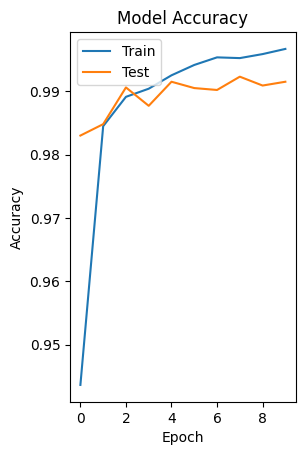

In [17]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

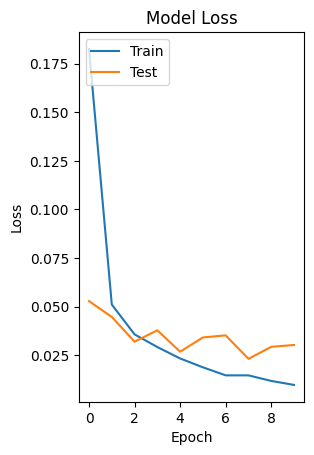

In [18]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [19]:
def predict_and_display(image_index):
    img = test_images[image_index]
    true_label = np.argmax(test_labels[image_index])
    
    # Reshape for single prediction (model expects batch dimension)
    img_for_pred = np.expand_dims(img, axis=0)
    
    # Make prediction
    prediction = model.predict(img_for_pred)
    predicted_label = np.argmax(prediction)
    
    # Display results
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()
    
    return predicted_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


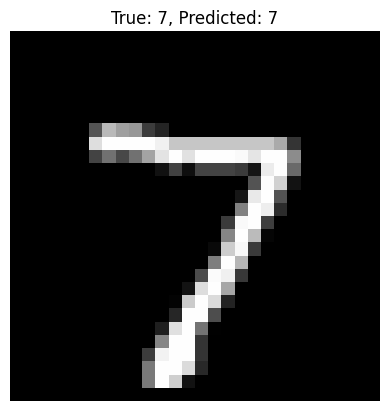

Predicted Digit: 7


In [20]:
# Example prediction
sample_index = 0  # Change this to test different images
predicted_digit = predict_and_display(sample_index)
print(f"Predicted Digit: {predicted_digit}")

In [21]:
# Add this at the end of your notebook
model.save('mnist_image.h5')